# Chronic Kidney Disease Analysis

Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data/kidney_disease.csv")
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [3]:
dfo = pd.read_csv("data/kidney_disease.csv")
dfo.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [4]:
mainatt = ["sg", "al", "rbc", "hemo","htn", "dm", "pc", "classification"]
df = df.drop([col for col in df.columns if not col in mainatt], axis=1)
df = df.dropna(axis=0)

In [5]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
for column in df.columns:
        if df[column].dtype == np.number:
            continue
        df[column] = LabelEncoder().fit_transform(df[column])

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  This is separate from the ipykernel package so we can avoid doing imports until


In [6]:
df.head()

,sg,al,rbc,pc,hemo,htn,dm,classification
2,1.010,2.0,1,1,9.6,0,1,0
3,1.005,4.0,1,0,11.2,1,0,0
4,1.010,2.0,1,1,11.6,0,0,0
7,1.015,2.0,1,0,12.4,0,1,0
8,1.015,3.0,1,0,10.8,1,1,0


In [7]:
df.tail()

,sg,al,rbc,pc,hemo,htn,dm,classification
395,1.020,0.0,1,1,15.7,0,0,1
396,1.025,0.0,1,1,16.5,0,0,1
397,1.020,0.0,1,1,15.8,0,0,1
398,1.025,0.0,1,1,14.2,0,0,1
399,1.025,0.0,1,1,15.8,0,0,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 216 entries, 2 to 399
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sg              216 non-null    float64
 1   al              216 non-null    float64
 2   rbc             216 non-null    int32  
 3   pc              216 non-null    int32  
 4   hemo            216 non-null    float64
 5   htn             216 non-null    int32  
 6   dm              216 non-null    int32  
 7   classification  216 non-null    int32  
dtypes: float64(3), int32(5)
memory usage: 11.0 KB


In [9]:
df.isnull().sum()

sg                0
al                0
rbc               0
pc                0
hemo              0
htn               0
dm                0
classification    0
dtype: int64

<AxesSubplot:>

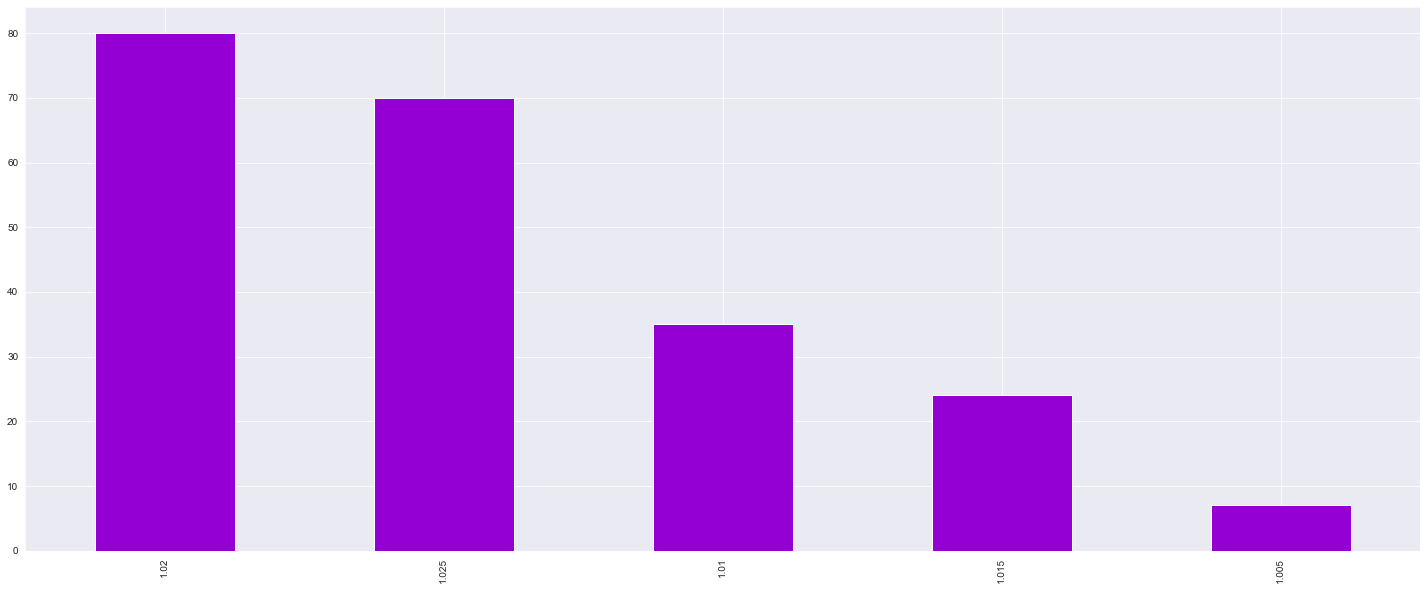

In [10]:
sns.set_style('darkgrid')
plt.figure(figsize=(25,10))
df['sg'].value_counts().plot.bar(color='darkviolet')

Data Splitting

In [11]:
X = df.drop(["classification"], axis=1)
y = df["classification"]

In [21]:
X.head()

,sg,al,rbc,pc,hemo,htn,dm
2,1.010,2.0,1,1,9.6,0,1
3,1.005,4.0,1,0,11.2,1,0
4,1.010,2.0,1,1,11.6,0,0
7,1.015,2.0,1,0,12.4,0,1
8,1.015,3.0,1,0,10.8,1,1


In [13]:
from sklearn.model_selection import train_test_split
X_train,  X_test, y_train, y_test = train_test_split(X, y, test_size= 0.35, shuffle=True)

ML Deployment

Support Vector Machine

In [14]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
SVM = SVC()
SVM.fit(X_train, y_train)
predictions = SVM.predict(X_test)
val1 = (accuracy_score(y_test, predictions)*100)
print("*Accuracy score for SVM: ", val1, "\n")

*Accuracy score for SVM:  98.68421052631578 



C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Random Forest Classifier

In [15]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(X_train, y_train)
predictions = RF.predict(X_test)
val2 = (accuracy_score(y_test, predictions)*100)
print("*Accuracy score for RF: ", val2, "\n")

*Accuracy score for RF:  94.73684210526315 



C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


DecisionTreeClassifier

In [16]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)
predictions = DT.predict(X_test)
val3 = (accuracy_score(y_test, predictions)*100)
print("*Accuracy score for DT: ", val3, "\n")

*Accuracy score for DT:  94.73684210526315 



KNeighborsClassifier

In [17]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)
predictions = KNN.predict(X_test)
val4 = (accuracy_score(y_test, predictions)*100)
print("*Accuracy score for KNN: ", val4, "\n")

*Accuracy score for KNN:  97.36842105263158 



LogisticRegression

In [18]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train, y_train)
predictions = LR.predict(X_test)
val5 = (accuracy_score(y_test, predictions)*100)
print("*Accuracy score for LR: ", val5, "\n")

*Accuracy score for LR:  98.68421052631578 



C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy Comparsion

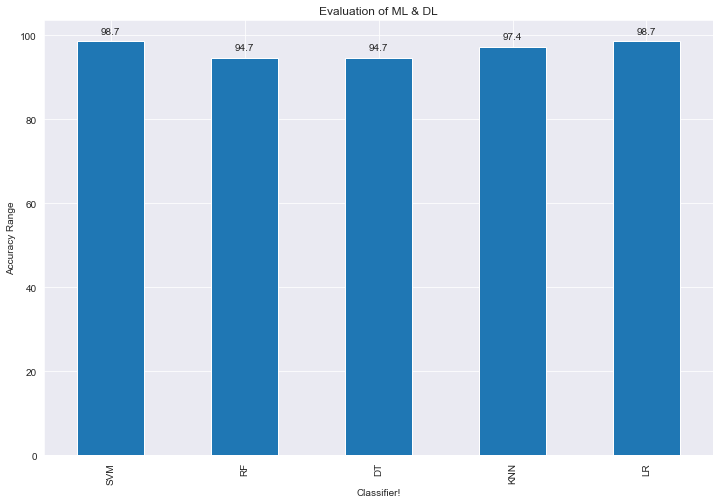

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


frequencies = [val1,val2,val3,val4,val5]
freq_series = pd.Series(frequencies)

x_labels = ['SVM', 'RF','DT','KNN','LR']


plt.figure(figsize=(12, 8))
ax = freq_series.plot(kind='bar')
ax.set_title('Evaluation of ML & DL')
ax.set_xlabel('Classifier!')
ax.set_ylabel('Accuracy Range')
ax.set_xticklabels(x_labels)


def add_value_labels(ax, spacing=5):
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.1f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.


# Call the function above. All the magic happens there.
add_value_labels(ax)
plt.show()
#plt.savefig("image.png")

In [20]:
import joblib
filename = 'model_kid.sav'
joblib.dump(LR, filename)

['model_kid.sav']